In [142]:
from datetime import datetime
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
%matplotlib inline 
#!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [507]:
def plotsir(t, SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D):
  f, ax = plt.subplots(1,1,figsize=(15,8))
  ax.plot(t, SU, 'b', alpha=0.7, linewidth=2, label='Susceptible Undecided')
  ax.plot(t, SA, 'r', alpha=0.7, linewidth=2, label='Susceptible Antivax')
  ax.plot(t, SP, 'g', alpha=0.7, linewidth=2, label='Susceptible Provax')
  ax.plot(t, SV, 'cyan', alpha=0.7, linewidth=2, label='Susceptible Vaccinated')
  ax.plot(t, IU, 'y', alpha=0.7, linewidth=2, label='Infected Undecided')
  ax.plot(t, IA, 'c', alpha=0.7, linewidth=2, label='Infected Antivax')
  ax.plot(t, IP, 'm', alpha=0.7, linewidth=2, label='Infected Provax')
  ax.plot(t, IV, 'peru', alpha=0.7, linewidth=2, label='Infected Vaccinated')
  ax.plot(t, RU, 'forestgreen', alpha=0.7, linewidth=2, label='Recovered Undecided')
  ax.plot(t, RA, 'mediumspringgreen', alpha=0.7, linewidth=2, label='Recovered Antivax')
  ax.plot(t, RP, 'navajowhite', alpha=0.7, linewidth=2, label='Recovered Provax')
  ax.plot(t, RV, 'mediumslateblue', alpha=0.7, linewidth=2, label='Recovered Vaccinated')
  ax.plot(t, D, 'lightsalmon', alpha=0.7, linewidth=2, label='Dead')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.set_title('Epidemic Infodemic Trajectory')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show();

In [508]:
def infodemic(t, SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D):
  f, ax = plt.subplots(1,1,figsize=(15,8))
  ax.plot(t, SU + IU + RU, 'b', alpha=0.7, linewidth=2, label='Undecided')
  ax.plot(t, SA + IA + RA, 'r', alpha=0.7, linewidth=2, label='Antivax')
  ax.plot(t, SP + IP + RP, 'g', alpha=0.7, linewidth=2, label='Provax')
  ax.plot(t, SV + IV + RV, 'y', alpha=0.7, linewidth=2, label='Vaccinated')
  ax.plot(t, D, 'm', alpha=0.7, linewidth=2, label='Dead')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.set_title('Infodemic Trajectory')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show();

In [509]:
def epidemic(t, SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D):
  f, ax = plt.subplots(1,1,figsize=(15,8))
  ax.plot(t, SU + SA + SP + SV, 'g', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, IU + IA + IP + IV, 'm', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, RU + RA + RP + RV, 'r', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'b', alpha=0.7, linewidth=2, label='Dead')
    
  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.set_title('Epidemic Trajectory')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show();

In [510]:
def vaccinated(t, SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D):
  f, ax = plt.subplots(1,1,figsize=(15,8))
  ax.plot(t, SV + IV + RV, 'g', alpha=0.7, linewidth=2, label='Vaccinated')
    
  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.set_title('Infodemic Trajectory')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show();

In [511]:
def deriv(y, t, N, b, v, r, c, w, s, g, k):
    SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D = y #S, E, I, R = y
    I = (IU + IA + IP + IV) / N 
    A = (SA + IA + RA) / N
    dSUdt = b - (r * I + c * A + w + b) * SU
    dSAdt = c * A * SU - (r * I + s + b) * SA
    dSPdt = w * SU + s * SA - (r * I + v + b) * SP
    dSVdt = v * SP - (r * I + b) * SV
    dIUdt = r * I * SU - (c * A + g + w + b) * IU - k*IU
    dIAdt = r * I * SA + c * A * IU - (g + s + b) * IA - k*IA
    dIPdt = r * I * SP + w * IU + s * IA - (g + b) * IP - k*IP
    dIVdt = r * I * SV - (g + b) * IV
    dRUdt = g * IU - (c * A + w + b) * RU
    dRAdt = c * A * RU + g * IA - (s + b) * RA
    dRPdt = w * RU + g * IP + s * RA - b * RP
    dRVdt = g * IV - b * RV
    dDdt = k*IU + k*IA + k*IP 
    return dSUdt, dSAdt, dSPdt, dSVdt, dIUdt, dIAdt, dIPdt, dIVdt, dRUdt, dRAdt, dRPdt, dRVdt, dDdt

In [566]:
N = 10000

# Measles parameters from Cambridge journal
b, r, g, v, s, c, w, k = 0.00036, 2.14, 0.14, 0.14, 0, 0.2, 0.4, 0.001

# Setting initial baseline values 
K = (N - 1) / 10
SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D = 9 * K, K, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

# Attempt to use Singapore values (not successful)
#SU, SA, SP, SV = 246526, 51598, 3014380, 3376297
#IU, IA, IP, IV = 1000, 0, 20, 1535
#RU, RA, RP, RV, D = 0, 0, 0, 62256, 0

In [567]:
t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, b, v, r, c, w, s, g, k))
SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D = ret.T

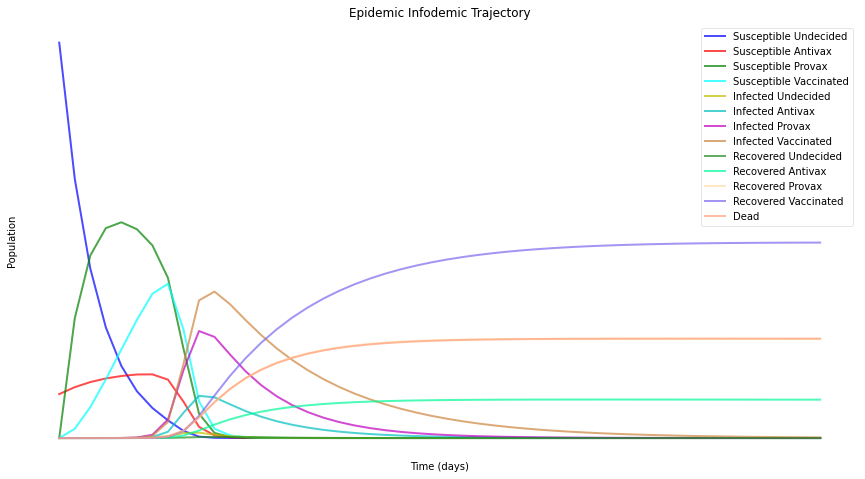

In [568]:
plotsir(t, SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D)

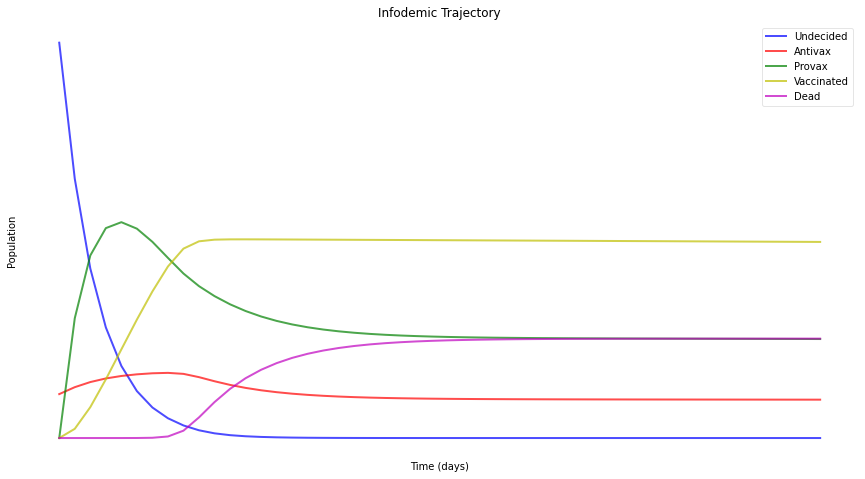

In [569]:
infodemic(t, SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D)

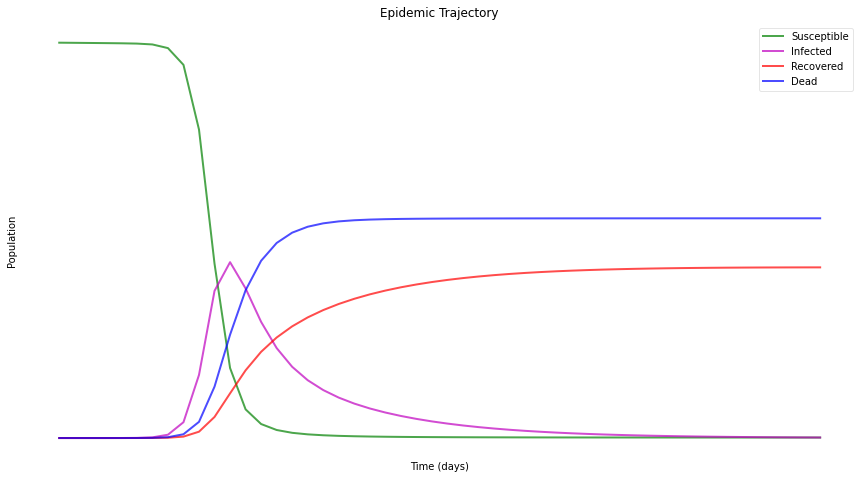

In [565]:
epidemic(t, SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D)

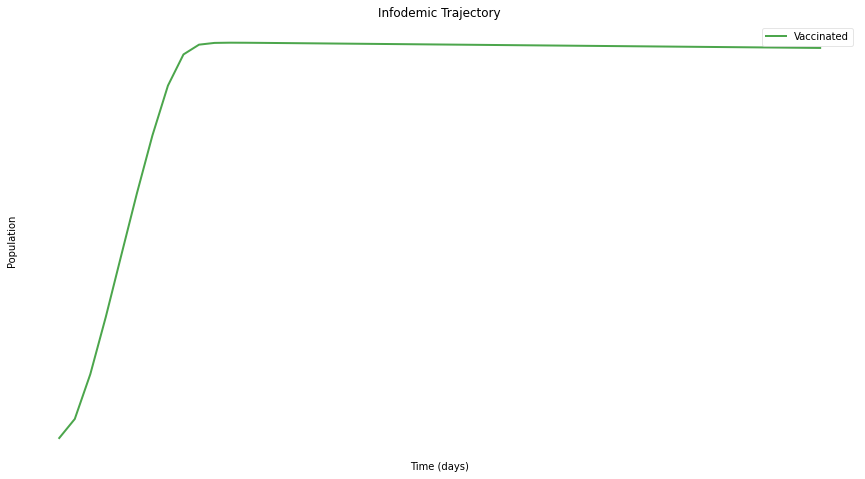

In [525]:
vaccinated(t, SU, SA, SP, SV, IU, IA, IP, IV, RU, RA, RP, RV, D)